In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

In [63]:
with open("../results/supply_rf_results.pkl", "rb") as file:
    rf_supply = pickle.load(file)

with open("../results/demand_rf_results.pkl", "rb") as file:
    rf_demand = pickle.load(file)

with open("../results/supply_nn_results.pkl", "rb") as file:
    nn_supply = pickle.load(file)
    

with open("../results/demand_nn_results.pkl", "rb") as file:
    nn_demand = pickle.load(file)

with open("../results/supply_arima_results.pkl", "rb") as file:
    arima_supply = pickle.load(file)

with open("../results/demand_arima_results.pkl", "rb") as file:
    arima_demand = pickle.load(file)

with open("../results/supply_org_results.pkl", "rb") as file:
    org_supply = pickle.load(file)

with open("../results/demand_org_results.pkl", "rb") as file:
    org_demand = pickle.load(file)

In [64]:
demand_predictions = {"org": org_demand, "Random Forest": rf_demand , "Deep Neural Network": nn_demand, "arima": arima_demand,}
supply_predictions = {"org": org_supply, "Random Forest": rf_supply, "Deep Neural Network": nn_supply,"arima": arima_supply}

In [92]:
model = "arima"
p =20

## ARIMA

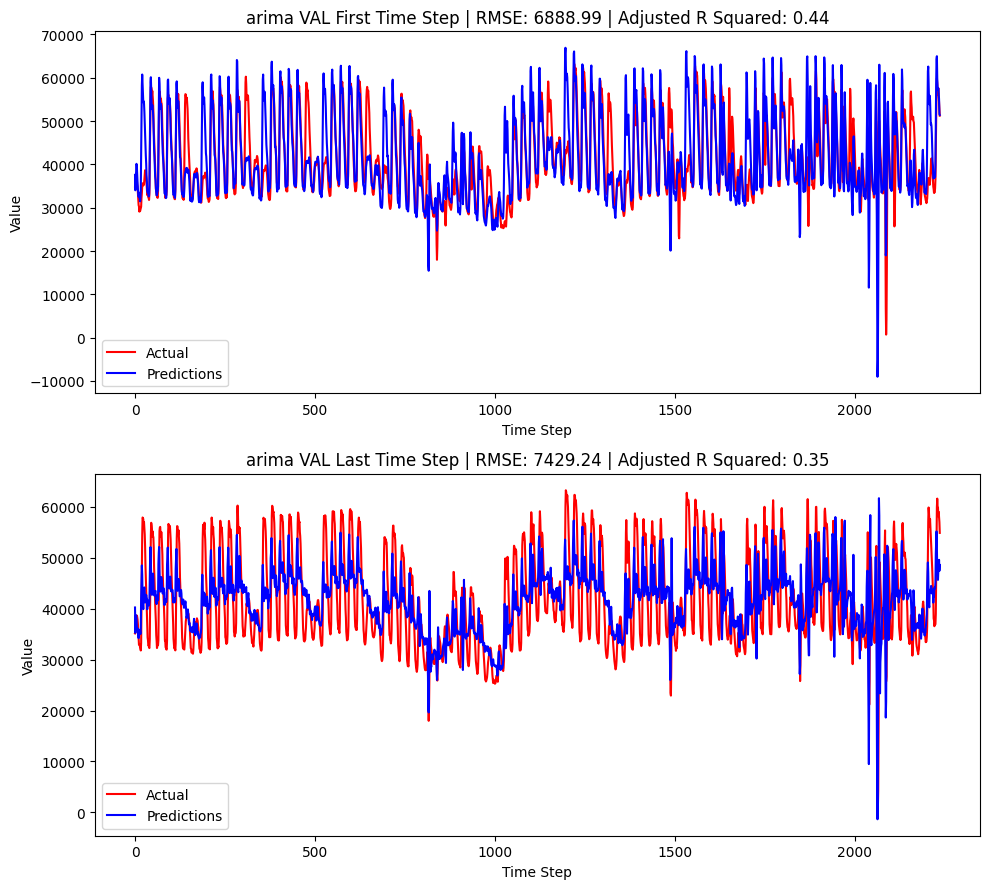

In [93]:
time_steps = [0, 23]
titles = ['First Time Step', 'Last Time Step']
p = 1
fig, axs = plt.subplots(2, 1, figsize=(10, 9))

for i, ax in enumerate(axs):
    time_step = time_steps[i]

    org = demand_predictions['org']['val'][:, time_step] - supply_predictions['org']['val'][:, time_step]
    pred = (demand_predictions[model]['formatted_val'][1:, time_step] - supply_predictions[model]['formatted_val'][:, time_step])

    ax.plot(org, label='Actual', color='red')
    ax.plot(pred, label='Predictions', color='blue')

    rmse = np.sqrt(mean_squared_error(org, pred))
    r2 = r2_score(org, pred)
    adjusted_r2 = 1 - (1-r2) * ((len(demand_predictions['org']['val']) / (len(demand_predictions['org']['val']) -p-1)))
    ax.set_title(f'{model} VAL {titles[i]} | RMSE: {rmse:.2f} | Adjusted R Squared: {adjusted_r2:.2f}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Value')
    ax.legend()

plt.tight_layout()
plt.show()



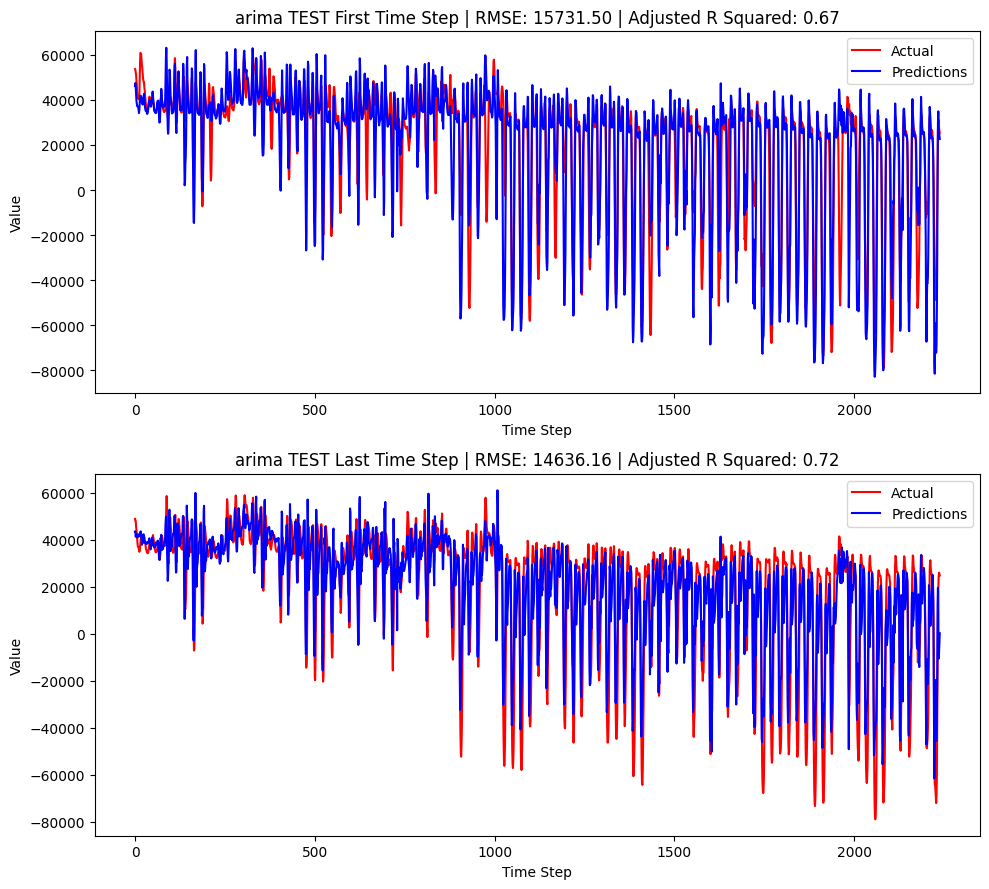

In [94]:
time_steps = [0, 23]
titles = ['First Time Step', 'Last Time Step']



fig, axs = plt.subplots(2, 1, figsize=(10, 9))

for i, ax in enumerate(axs):
    time_step = time_steps[i]

    org = demand_predictions['org']['test'][:, time_step] - supply_predictions['org']['test'][:, time_step]
    pred = (demand_predictions[model]['formatted_test'][:, time_step] - supply_predictions[model]['formatted_test'][:, time_step])

    ax.plot(org, label='Actual', color='red')
    ax.plot(pred, label='Predictions', color='blue')

    rmse = np.sqrt(mean_squared_error(org, pred))
    r2 = r2_score(org, pred)
    adjusted_r2 = 1 - (1-r2) * ((len(demand_predictions['org']['test']) / (len(demand_predictions['org']['test']) -p-1)))
    ax.set_title(f'{model} TEST {titles[i]} | RMSE: {rmse:.2f} | Adjusted R Squared: {adjusted_r2:.2f}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Value')
    ax.legend()

plt.tight_layout()
plt.show()



## ANALYSIS OF RESULTS

In [99]:
model = "Random Forest"
p =20

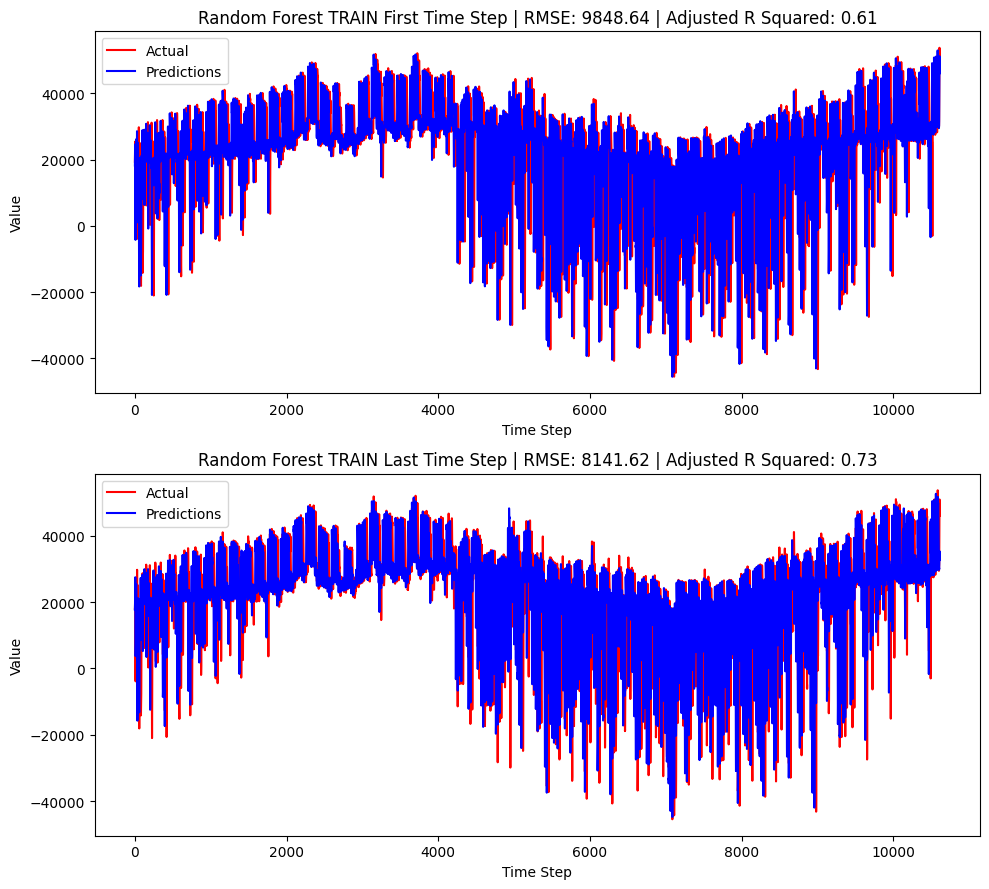

In [100]:
time_steps = [0, 23]
titles = ['First Time Step', 'Last Time Step']



fig, axs = plt.subplots(2, 1, figsize=(10, 9))

for i, ax in enumerate(axs):
    time_step = time_steps[i]

    org = demand_predictions['org']['train'][:, time_step] - supply_predictions['org']['train'][:, time_step]
    pred = demand_predictions[model]['formatted_train'][:, time_step] - supply_predictions[model]['formatted_train'][:, time_step]

    ax.plot(org, label='Actual', color='red')
    ax.plot(pred, label='Predictions', color='blue')

    rmse = np.sqrt(mean_squared_error(org, pred))
    r2 = r2_score(org, pred)
    adjusted_r2 = 1 - (1-r2) * ((len(demand_predictions['org']['train']) / (len(demand_predictions['org']['train']) -p-1)))
    ax.set_title(f'{model} TRAIN {titles[i]} | RMSE: {rmse:.2f} | Adjusted R Squared: {adjusted_r2:.2f}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Value')
    ax.legend()

plt.tight_layout()
plt.show()



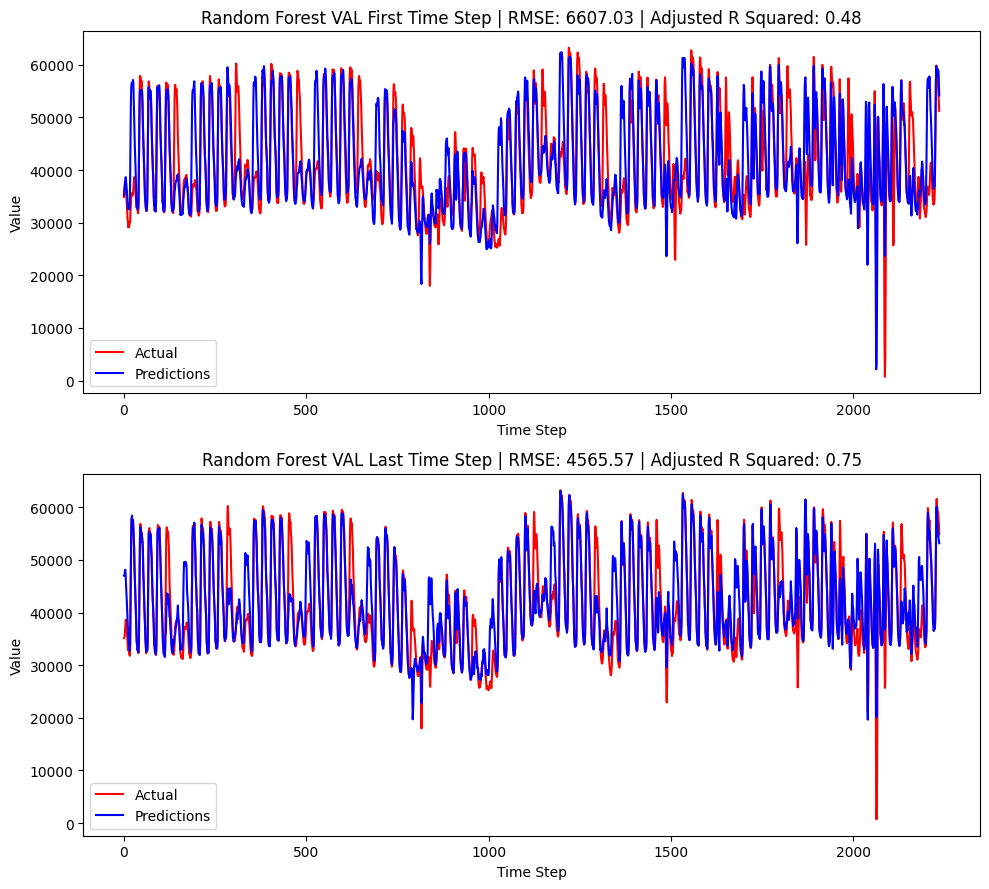

In [101]:
time_steps = [0, 23]
titles = ['First Time Step', 'Last Time Step']

fig, axs = plt.subplots(2, 1, figsize=(10, 9))

for i, ax in enumerate(axs):
    time_step = time_steps[i]

    org = demand_predictions['org']['val'][:, time_step] - supply_predictions['org']['val'][:, time_step]
    pred = demand_predictions[model]['formatted_val'][:, time_step] - supply_predictions[model]['formatted_val'][:, time_step]

    ax.plot(org, label='Actual', color='red')
    ax.plot(pred, label='Predictions', color='blue')

    rmse = np.sqrt(mean_squared_error(org, pred))
    r2 = r2_score(org, pred)
    adjusted_r2 = 1 - (1-r2) * ((len(demand_predictions['org']['val']) / (len(demand_predictions['org']['val']) -p-1)))
    ax.set_title(f'{model} VAL {titles[i]} | RMSE: {rmse:.2f} | Adjusted R Squared: {adjusted_r2:.2f}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Value')
    ax.legend()

plt.tight_layout()
plt.show()



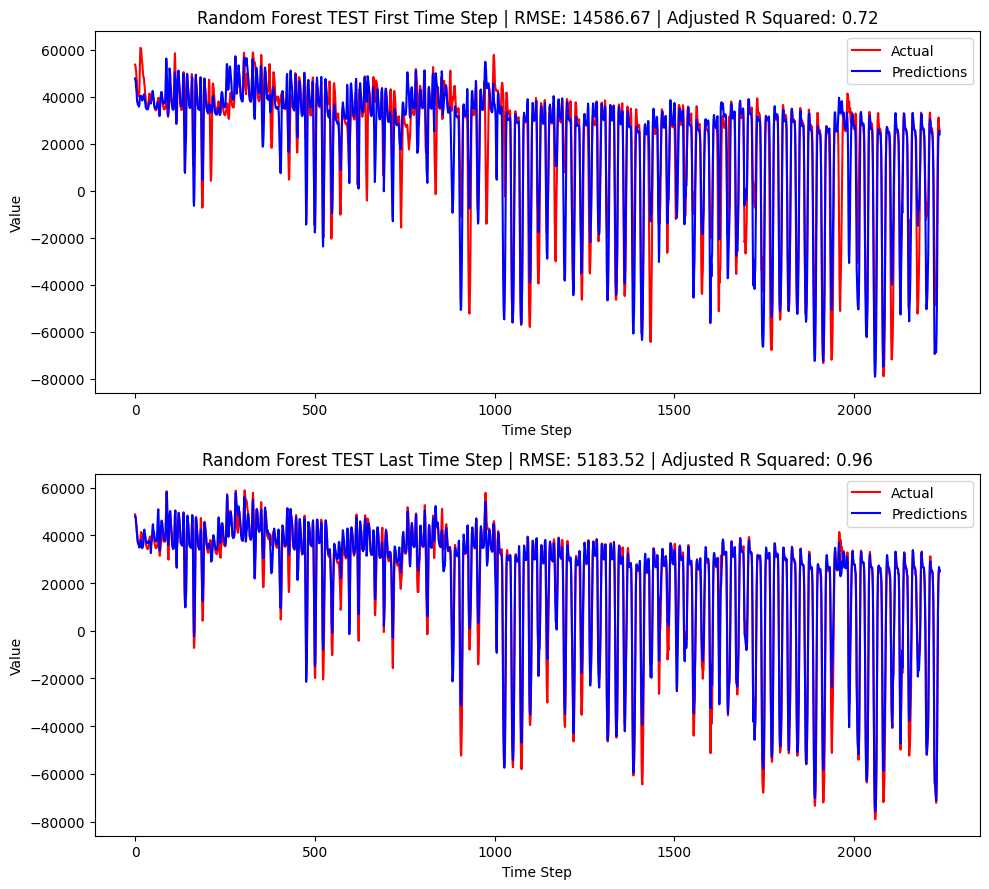

In [102]:
time_steps = [0, 23]
titles = ['First Time Step', 'Last Time Step']



fig, axs = plt.subplots(2, 1, figsize=(10, 9))

for i, ax in enumerate(axs):
    time_step = time_steps[i]

    org = demand_predictions['org']['test'][:, time_step] - supply_predictions['org']['test'][:, time_step]
    pred = demand_predictions[model]['formatted_test'][:, time_step] - supply_predictions[model]['formatted_test'][:, time_step]

    ax.plot(org, label='Actual', color='red')
    ax.plot(pred, label='Predictions', color='blue')

    rmse = np.sqrt(mean_squared_error(org, pred))
    r2 = r2_score(org, pred)
    adjusted_r2 = 1 - (1-r2) * ((len(demand_predictions['org']['test']) / (len(demand_predictions['org']['test']) -p-1)))
    ax.set_title(f'{model} TEST {titles[i]} | RMSE: {rmse:.2f} | Adjusted R Squared: {adjusted_r2:.2f}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Value')
    ax.legend()

plt.tight_layout()
plt.show()

